<b>imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

<b>file reading - Bruker

In [2]:
source = "Bruker"

path_label = "20230607_CVD_2802"

input_file = open("./" + path_label + "_map/" + path_label + "_60s_10x10pts_roi_net_sum.txt", "r")

sample_name = "CVD" + path_label[-4:]

#dat_xx_dx are 10x10 arrays
dat_si_d1 = np.zeros((10, 10))
dat_ga_d1 = np.zeros((10, 10))

dat_si_d2 = np.zeros((10, 10))
dat_ga_d2 = np.zeros((10, 10))

ga_si_d1 = np.zeros((10, 10))
ga_si_d2 = np.zeros((10, 10))

#how this works: readline returns a single empty string ONLY IF the EOF is reached
s = input_file.readline().split() #split with no delimiter treats consecutive spaces as one
while s != [""]:

    if s[0][0] == "2": #check if it's a line containing data - 
                       #the line starts with the filename, which starts with the year, which starts with a 2
                       #this will break if you are using the script in the 31st century
                
        x = int(s[0][-3]) #x is the slower changing index
        y = int(s[0][-1]) #y is the most rapidly changing index
        si_counts = float(s[1])
        ga_counts = float(s[6])
        if s[0][-5] == "1": #separate into detector 1 and detector 2
            dat_si_d1[x][y] = si_counts
            dat_ga_d1[x][y] = ga_counts
            ga_si_d1[x][y] = ga_counts/si_counts
        elif s[0][-5] == "2":
            dat_si_d2[x][y] = si_counts
            dat_ga_d2[x][y] = ga_counts
            ga_si_d2[x][y] = ga_counts/si_counts
               
    s = input_file.readline().split(" ")
        
input_file.close()

<b>file reading - PyMca

<b>statistical processing

In [3]:
#vec_xx_dx are vectors containing the data in no particular order
vec_si_d1 = dat_si_d1.reshape(100)
vec_si_d2 = dat_si_d2.reshape(100)
vec_ga_d1 = dat_ga_d1.reshape(100)
vec_ga_d2 = dat_ga_d2.reshape(100)

vec_ga_si_d1 = ga_si_d1.reshape(100)
vec_ga_si_d2 = ga_si_d2.reshape(100)

def getStats(ar):
    """calculate and return the follwing statistical properties of ar:
    average
    standard deviation
    average, with 5 highest and lowest points removed
    standard deviation, with 5 highest and lowest points removed

    ar must be a 1d array
    """
    av = np.average(ar)
    std = np.sqrt(np.sum((ar-av)**2)/ar.size)

    trim = np.sort(ar)[5:-5]

    av_trim = np.average(trim)
    std_trim = np.sqrt(np.sum((trim-av_trim)**2)/trim.size)

    return av, std, av_trim, std_trim

avg_si_d1, std_si_d1, t_avg_si_d1, t_std_si_d1 = getStats(vec_si_d1)
avg_si_d2, std_si_d2, t_avg_si_d2, t_std_si_d2 = getStats(vec_si_d2)

avg_ga_d1, std_ga_d1, t_avg_ga_d1, t_std_ga_d1 = getStats(vec_ga_d1)
avg_ga_d2, std_ga_d2, t_avg_ga_d2, t_std_ga_d2 = getStats(vec_ga_d2)

avg_ga_si_d1, std_ga_si_d1, t_avg_ga_si_d1, t_std_ga_si_d1 = getStats(vec_ga_si_d1)
avg_ga_si_d2, std_ga_si_d2, t_avg_ga_si_d2, t_std_ga_si_d2 = getStats(vec_ga_si_d2)

print(sample_name + " Statistics, " + source)
print("\t\t\t\ttrimmed\ttrimmed")
print("Signal\tDet.\tAvg\tSTD\tavg\tstd")
print("Si\td1\t{0:.0f}\t{1:.0f}\t{2:.0f}\t{3:.0f}".format(avg_si_d1, std_si_d1, t_avg_si_d1, t_std_si_d1))
print("Si\td2\t{0:.0f}\t{1:.0f}\t{2:.0f}\t{3:.0f}".format(avg_si_d2, std_si_d2, t_avg_si_d2, t_std_si_d2))
print("Ga\td1\t{0:.0f}\t{1:.0f}\t{2:.0f}\t{3:.0f}".format(avg_ga_d1, std_ga_d1, t_avg_ga_d1, t_std_ga_d1))
print("Ga\td2\t{0:.0f}\t{1:.0f}\t{2:.0f}\t{3:.0f}".format(avg_ga_d2, std_ga_d2, t_avg_ga_d2, t_std_ga_d2))
print("Ga/Si\td1\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(avg_ga_si_d1, std_ga_si_d1, t_avg_ga_si_d1, t_std_ga_si_d1))
print("Ga/Si\td2\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(avg_ga_si_d2, std_ga_si_d2, t_avg_ga_si_d2, t_std_ga_si_d2))


stats_out_file = open("./" + path_label + "_map/results_out/" + path_label + "_stats_" + source + ".txt", "w")

stats_out_file.write("\t\t\t\ttrimmed\ttrimmed\n")
stats_out_file.write("Signal\tDet.\tAvg\tSTD\tavg\tstd\n")
stats_out_file.write("Si\td1\t{0:.0f}\t{1:.0f}\t{2:.0f}\t{3:.0f}\n".format(avg_si_d1, std_si_d1, t_avg_si_d1, t_std_si_d1))
stats_out_file.write("Si\td1\t{0:.0f}\t{1:.0f}\t{2:.0f}\t{3:.0f}\n".format(avg_si_d2, std_si_d2, t_avg_si_d2, t_std_si_d2))
stats_out_file.write("Ga\td1\t{0:.0f}\t{1:.0f}\t{2:.0f}\t{3:.0f}\n".format(avg_ga_d1, std_ga_d1, t_avg_ga_d1, t_std_ga_d1))
stats_out_file.write("Ga\td2\t{0:.0f}\t{1:.0f}\t{2:.0f}\t{3:.0f}\n".format(avg_ga_d2, std_ga_d2, t_avg_ga_d2, t_std_ga_d2))
stats_out_file.write("Ga/Si\td1\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}\n".format(avg_ga_si_d1, std_ga_si_d1, t_avg_ga_si_d1, t_std_ga_si_d1))
stats_out_file.write("Ga/Si\td2\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}\n".format(avg_ga_si_d2, std_ga_si_d2, t_avg_ga_si_d2, t_std_ga_si_d2))

stats_out_file.close()

CVD2802 Statistics, Bruker
				trimmed	trimmed
Signal	Det.	Avg	STD	avg	std
Si	d1	325034	2597	325046	2177
Si	d1	338581	2696	338654	2283
Ga	d1	16539	209	16541	169
Ga	d2	16911	202	16912	163
Ga/Si	d1	0.0509	0.0005	0.0509	0.0004
Ga/Si	d2	0.0499	0.0005	0.0499	0.0004


<b>Generate probability plots

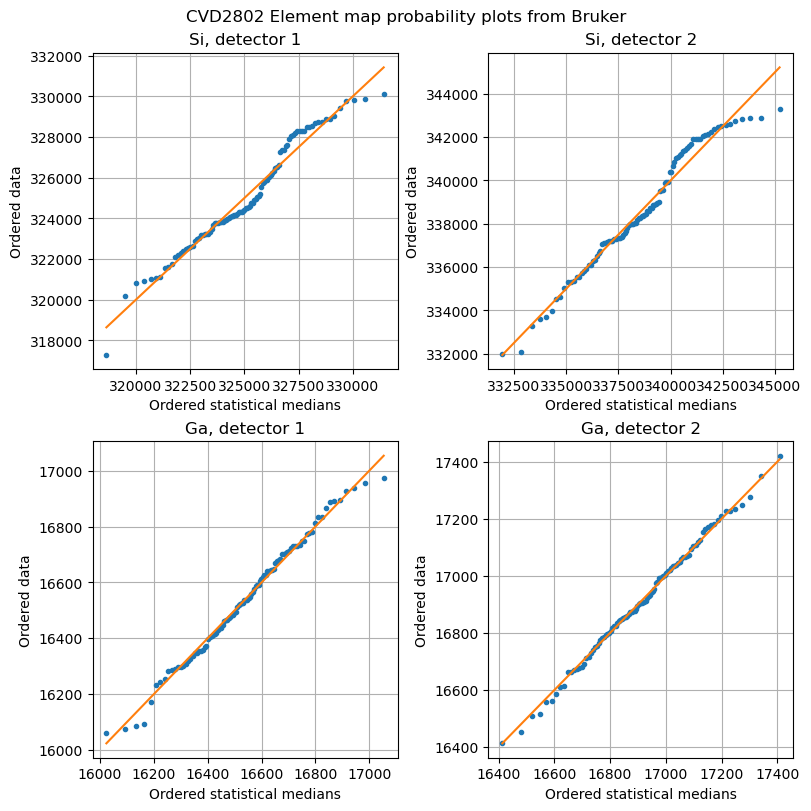

In [4]:
def probPlot(ax, dat, avg, std, title):
    osm, osr = stats.probplot(dat, (avg, std), dist="norm", fit=False)
    ax.plot(osm, osr, ".") #plot data
    ax.plot(osm, osm, "-") #plot line y=x
    ax.grid(True)
    ax.set_title(title)
    ax.set_xlabel("Ordered statistical medians")
    ax.set_ylabel("Ordered data")

f, ((ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=2, ncols = 2, figsize = (8, 8), layout="constrained")

probPlot(ax7, vec_si_d1, avg_si_d1, std_si_d1, "Si, detector 1")
probPlot(ax8, vec_si_d2, avg_si_d2, std_si_d2, "Si, detector 2")
probPlot(ax9, vec_ga_d1, avg_ga_d1, std_ga_d1, "Ga, detector 1")
probPlot(ax10, vec_ga_d2, avg_ga_d2, std_ga_d2, "Ga, detector 2")

f.suptitle(sample_name + " Element map probability plots from " + source)

plt.savefig("./" + path_label + "_map/results_out/" + path_label + "_prob_plots_" + source + ".png",
            dpi="figure",
            format="png")

<b>plot heatmap results

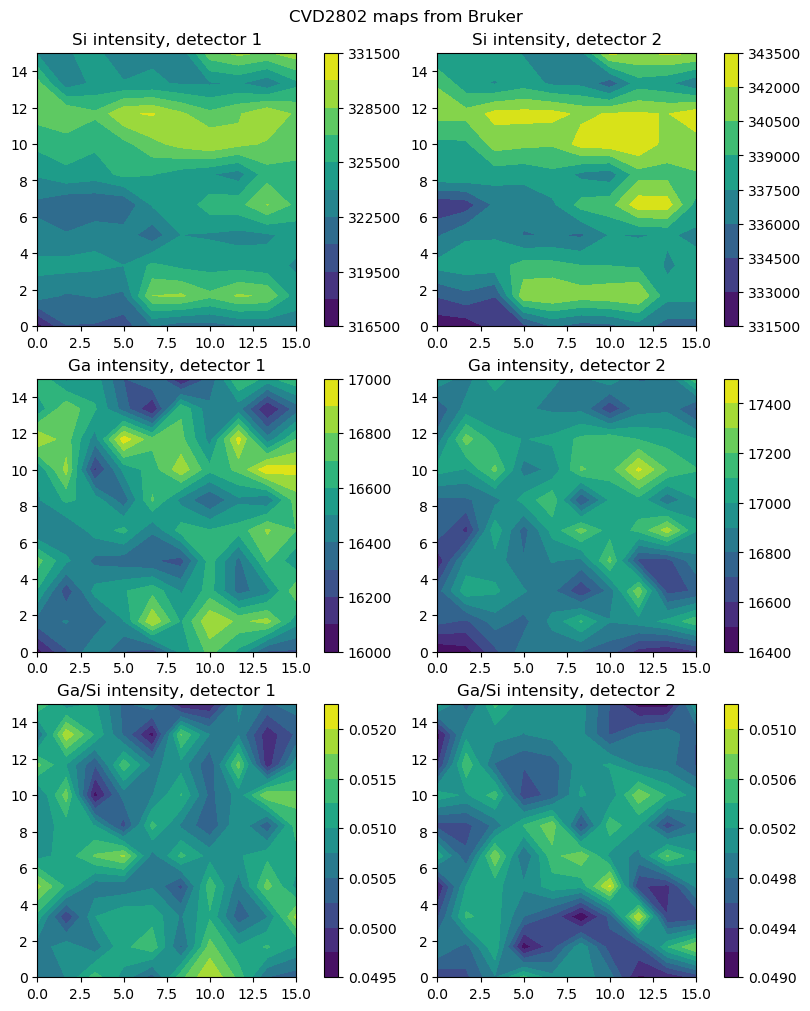

In [5]:
c="viridis"

fg, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(8, 10), layout="constrained")

def drawMap(a, dat, cm, title):
    """draw contour plot
    dat is array of data to draw
    a is axes on which to draw it
    cm is the color map to use
    title is the title to write
    """
    im_pointer = a.contourf(dat, levels = 10, extent = [0, 15, 0, 15], cmap = cm)
    plt.colorbar(im_pointer, ax=a)
    a.set_title(title)

drawMap(ax1, dat_si_d1, c, "Si intensity, detector 1")
drawMap(ax2, dat_si_d2, c, "Si intensity, detector 2")

drawMap(ax3, dat_ga_d1, c, "Ga intensity, detector 1")
drawMap(ax4, dat_ga_d2, c, "Ga intensity, detector 2")

drawMap(ax5, dat_ga_d1/dat_si_d1, c, "Ga/Si intensity, detector 1")
drawMap(ax6, dat_ga_d2/dat_si_d2, c, "Ga/Si intensity, detector 2")

fg.suptitle(sample_name + " maps from " + source)

plt.savefig("./" + path_label + "_map/results_out/" + path_label + "_intensity_map_" + source + ".png",
            dpi="figure",
            format="png")

#for contourf(), [0][0] is displayed in the bottom left, [0][9] is in the bottom right
#for imshow(), [0][0] is displayed in the top left, [0][9] is in the top right